In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, fromHB5Table1
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution

# LEP `ZH -> jets` [hep-ex/0107034](https://arxiv.org/abs/hep-ex/0107034)

Could not detect luminosity


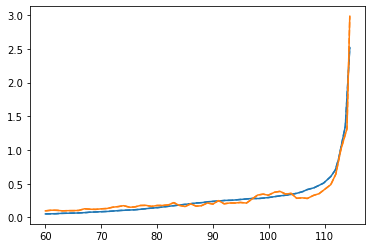

Looks good. Saving this to eeHZ_LEP_LEPComb_2.json


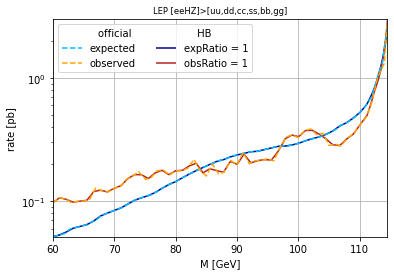

In [2]:
df = fromHB5Table1("LEP_h-2jets_0107034", "LEP")

process = {"channels": [["eeHZ", d] for d in ["gg", "uu", "dd", "cc", "ss", "bb"]]}
limitFile = implementChannelLimit(
    559837,
    process,
    "Fig 2",
    df,
    experiment="LEPComb",
    luminosity=2.5,
    massResolution=resolution.LEPZH,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# LEP `ZH -> jets` unpublished combination of [hep-ex/0510022](https://arxiv.org/abs/hep-ex/0510022), [hep-ex/0205055](https://arxiv.org/abs/hep-ex/0205055),[hep-ex/0312042](https://arxiv.org/abs/hep-ex/0312042), [hep-ex/0408097](https://arxiv.org/abs/hep-ex/0408097)

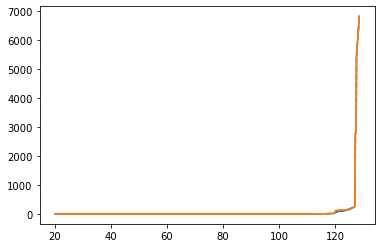

Looks good. Saving this to eeHZ_LEP_LEPComb_3.json


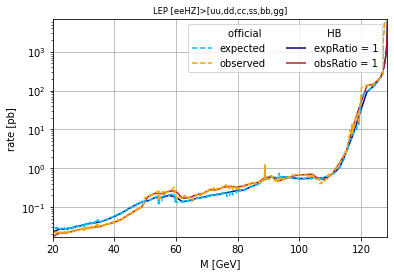

In [3]:
from collections import OrderedDict
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import getFilename, writeToJson


df = fromHB5Table1("LEP_h-2jets", "LEP")

process = {"channels": [["eeHZ", d] for d in ["gg", "uu", "dd", "cc", "ss", "bb"]]}

data = OrderedDict()
data["limitClass"] = "ChannelLimit"
data["id"] = 510022
data["reference"] = "unpublished"
data["source"] = "hep-ex/0510022 + hep-ex/025055 + hep-ex/0312042 + hep-ex/0408097"
data["citeKey"] = ""
data["collider"] = "LEP"
data["experiment"] = "LEPComb"
data["luminosity"] = (
    0.61
    + (0.011 + 0.123 + 0.08 + 0.045 + 0.086 + 0.079 + 0.029 + 0.177)
    + 0.42
    + (0.191 + 0.195 + 0.199 + 0.2016 + 0.206)
)
data["process"] = process
plt.figure()
plt.plot(df.m, df.exp, c="C0")
plt.plot(df.m, df.exp, c="C0", ls="--")
plt.plot(df.m, df.obs, c="C1")
plt.plot(df.m, df.obs, c="C1", ls="--")
plt.show()
data["analysis"] = OrderedDict()
data["analysis"]["massResolution"] = resolution.LEPZH
data["analysis"]["grid"] = {"mass": df.m.to_numpy().tolist()}
data["analysis"]["limit"] = {
    "observed": df.obs.to_numpy().tolist(),
    "expected": df.exp.to_numpy().tolist(),
}
filename = getFilename(
    "eeHZ",
    data["collider"],
    data["experiment"],
    data["luminosity"],
)
limitFile = writeToJson(filename, data)

lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
